In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [84]:
#Reading the data file

df = pd.read_excel(r'C:\Users\DELL 7470\Desktop\HULL RESEARCH WORK\GestationalDiabeticDataSet.xlsx')

df.head(10)


,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
0,1,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0,0
1,2,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0,0
2,3,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0,0
3,4,28,2,1,NaN,51.0,0,0,0,0,99.0,70,NaN,15.0,0,0,0
4,5,21,2,1,NaN,52.0,0,0,0,0,116.0,65,NaN,15.0,0,0,0
5,6,29,2,1,NaN,51.0,0,0,0,0,98.0,63,NaN,15.2,0,0,0
6,7,26,2,1,NaN,51.0,0,0,0,0,94.0,68,NaN,15.0,0,0,0
7,8,27,1,0,NaN,52.0,0,0,0,0,116.0,63,NaN,12.0,0,0,0
8,9,26,1,0,NaN,57.0,0,0,0,0,108.0,62,NaN,14.0,0,0,0
9,10,21,2,1,NaN,52.0,0,0,0,0,98.0,78,NaN,13.0,0,0,0


In [85]:
df.shape

(3525, 17)

In [86]:
df.describe()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
count,3525.000000,3525.000000,3525.000000,3525.000000,2444.000000,2524.000000,3525.000000,3525.000000,3525.00000,3525.000000,1820.000000,3525.000000,3012.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,1763.000000,32.581277,2.076312,0.960851,27.854092,46.471870,0.498156,0.364823,0.35773,0.264681,135.762088,81.538156,170.707503,13.959801,0.449645,0.293050,0.389220
std,1017.724177,6.169107,0.838637,0.722313,5.714737,10.800813,0.500068,0.481449,0.47940,0.441226,22.742844,11.379758,48.160549,1.863969,0.497529,0.455226,0.487643
min,1.000000,20.000000,1.000000,0.000000,13.300000,15.000000,0.000000,0.000000,0.00000,0.000000,90.000000,60.000000,80.000000,8.800000,0.000000,0.000000,0.000000
25%,882.000000,28.000000,1.000000,0.000000,24.400000,42.000000,0.000000,0.000000,0.00000,0.000000,122.000000,74.000000,142.000000,12.700000,0.000000,0.000000,0.000000
50%,1763.000000,32.000000,2.000000,1.000000,27.500000,49.000000,0.000000,0.000000,0.00000,0.000000,132.000000,81.000000,156.000000,14.000000,0.000000,0.000000,0.000000
75%,2644.000000,37.000000,3.000000,1.000000,31.000000,55.000000,1.000000,1.000000,1.00000,1.000000,153.000000,86.000000,195.000000,15.000000,1.000000,1.000000,1.000000
max,3525.000000,45.000000,4.000000,2.000000,45.000000,70.000000,1.000000,1.000000,1.00000,1.000000,185.000000,124.000000,403.000000,18.000000,1.000000,1.000000,1.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case Number                      3525 non-null   int64  
 1   Age                              3525 non-null   int64  
 2   No of Pregnancy                  3525 non-null   int64  
 3   Gestation in previous Pregnancy  3525 non-null   int64  
 4   BMI                              2444 non-null   float64
 5   HDL                              2524 non-null   float64
 6   Family History                   3525 non-null   int64  
 7   unexplained prenetal loss        3525 non-null   int64  
 8   Large Child or Birth Default     3525 non-null   int64  
 9   PCOS                             3525 non-null   int64  
 10  Sys BP                           1820 non-null   float64
 11  Dia BP                           3525 non-null   int64  
 12  OGTT                

In [88]:
# Check for missing values in each column
missing_values = df.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Case Number                           0
Age                                   0
No of Pregnancy                       0
Gestation in previous Pregnancy       0
BMI                                1081
HDL                                1001
Family History                        0
unexplained prenetal loss             0
Large Child or Birth Default          0
PCOS                                  0
Sys BP                             1705
Dia BP                                0
OGTT                                513
Hemoglobin                            0
Sedentary Lifestyle                   0
Prediabetes                           0
Class Label(GDM /Non GDM)             0
dtype: int64


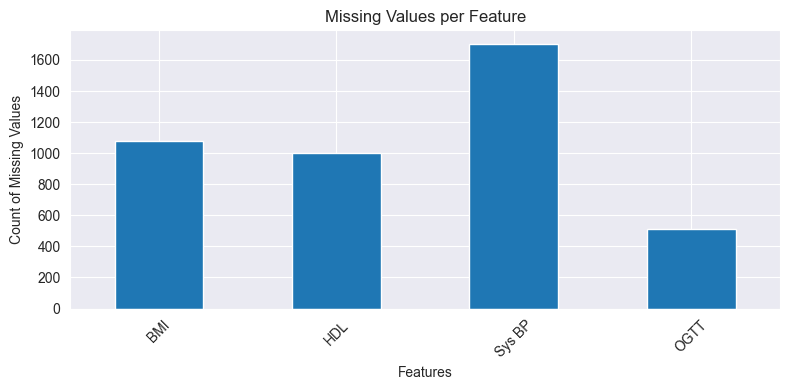

In [89]:
# Assuming your DataFrame is named 'df'
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0] 
# Filter features with␣missing values
# Create a bar chart
plt.figure(figsize=(8, 4))
missing_values.plot(kind='bar')
plt.title('Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45) # Rotate x-axis labels for readability
# Show the plot
plt.tight_layout()
plt.show()

In [90]:
# Filling missing values for numerical features
# Numerical columns for median imputation
numerical_columns = ['BMI', 'HDL', 'Sys BP', 'OGTT']
# Impute missing values with the median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
# Check if there are any remaining missing values
remaining_missing_values = df.isnull().sum()
# Display the columns with missing values and their counts (after imputation)
remaining_missing_values[remaining_missing_values > 0]

Series([], dtype: int64)

In [91]:
# Check for missing values in each column
missing_values = df.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Case Number                        0
Age                                0
No of Pregnancy                    0
Gestation in previous Pregnancy    0
BMI                                0
HDL                                0
Family History                     0
unexplained prenetal loss          0
Large Child or Birth Default       0
PCOS                               0
Sys BP                             0
Dia BP                             0
OGTT                               0
Hemoglobin                         0
Sedentary Lifestyle                0
Prediabetes                        0
Class Label(GDM /Non GDM)          0
dtype: int64


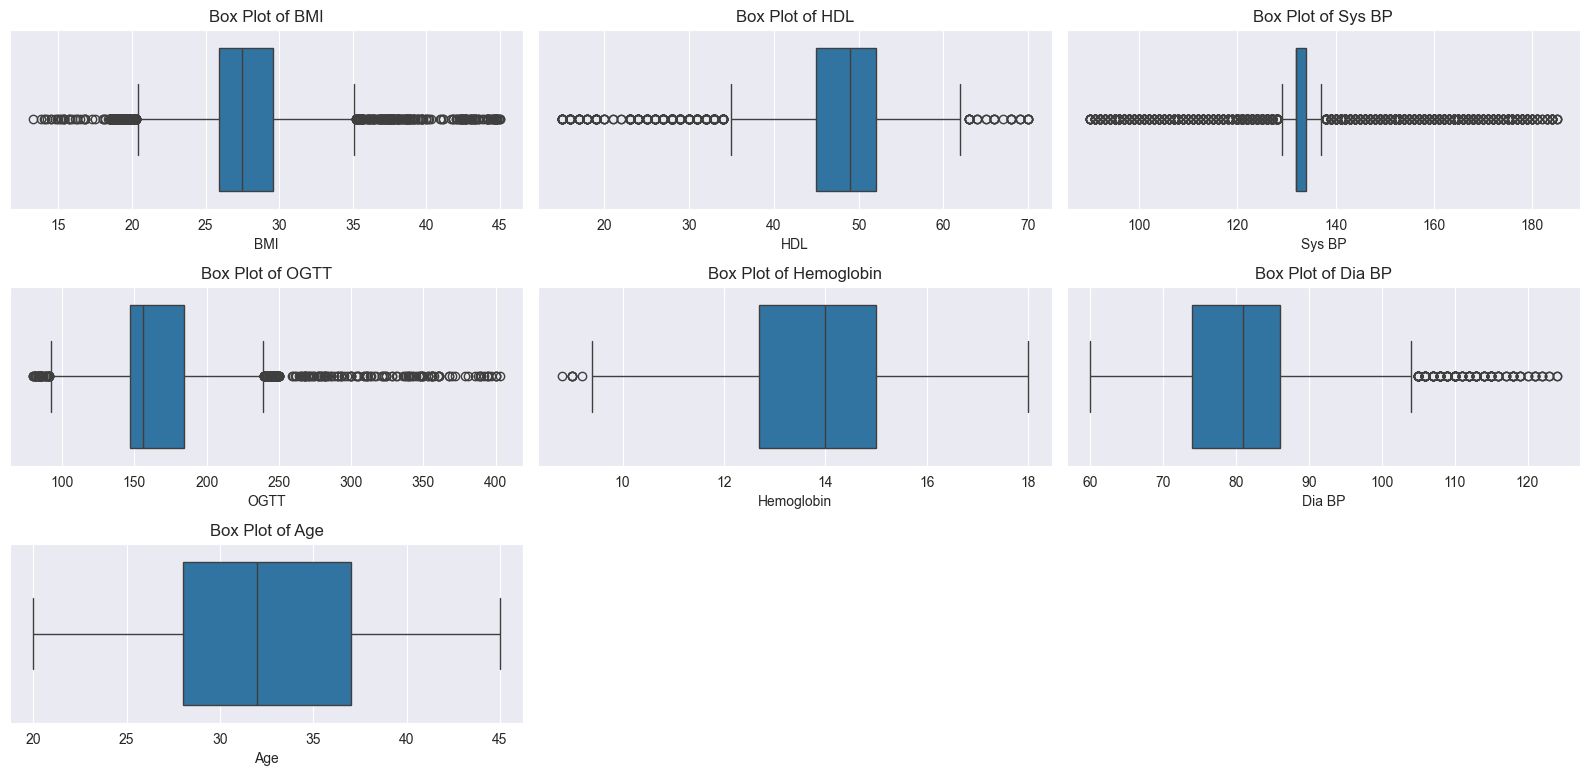

Outliers in BMI:
      Case Number  Age  No of Pregnancy  Gestation in previous Pregnancy  \
1200         1201   25                1                                0   
1201         1202   24                1                                0   
1202         1203   25                1                                0   
1203         1204   26                1                                0   
1204         1205   24                1                                0   
...           ...  ...              ...                              ...   
3504         3505   26                4                                2   
3506         3507   33                4                                1   
3510         3511   26                1                                2   
3512         3513   38                1                                2   
3516         3517   45                2                                0   

       BMI   HDL  Family History  unexplained prenetal loss  \
1200  2

In [92]:
#Checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Specify numerical columns for outlier detection
numerical_columns = ['BMI', 'HDL', 'Sys BP', 'OGTT','Hemoglobin', 'Dia BP','Age']

# Create subplots for outlier visualization
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')
    
plt.tight_layout()
plt.show()

# Define a function to identify outliers using IQR method
def identify_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
    
# Detect and display outliers for each numerical column
for column in numerical_columns:
    outliers = identify_outliers_iqr(df, column)
    if not outliers.empty:
        print(f'Outliers in {column}:')
        print(outliers)

In [93]:
# Define a function to handle outliers using IQR method
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), data[column].median(), data[column])
# Specify numerical columns for outlier handling
numerical_columns = ['BMI', 'HDL', 'Sys BP', 'OGTT','Hemoglobin', 'Dia BP','Age']

# Handle outliers for each numerical column
for column in numerical_columns:
    handle_outliers_iqr(df, column)

In [21]:
 df['Class Label(GDM /Non GDM)'].value_counts()

Class Label(GDM /Non GDM)
0    2153
1    1372
Name: count, dtype: int64

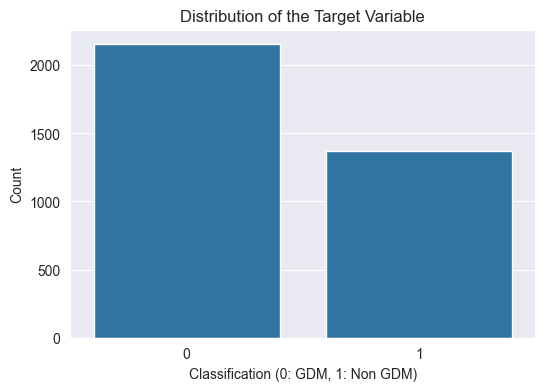

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class Label(GDM /Non GDM)', data=df)
plt.title('Distribution of the Target Variable')
plt.xlabel('Classification (0: GDM, 1: Non GDM)')
plt.ylabel('Count')
plt.show()

In [95]:
# Separate features (X) and target variable (y)
X = df.drop('Class Label(GDM /Non GDM)', axis=1)
y = df['Class Label(GDM /Non GDM)']

In [96]:
 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
 from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)

# Convert the normalized arrays back to DataFrames (optional)
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X.columns)

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
# Fit the model to the normalized training data
rf_model.fit(X_train_normalized, y_train)
# Predictions on the test set
y_pred_rf = rf_model.predict(X_test_normalized)
# Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9673758865248226

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       448
           1       0.95      0.96      0.96       257

    accuracy                           0.97       705
   macro avg       0.96      0.97      0.96       705
weighted avg       0.97      0.97      0.97       705


Confusion Matrix:
[[436  12]
 [ 11 246]]


                            Feature  Importance
0                       Case Number    0.301338
12                             OGTT    0.201849
15                      Prediabetes    0.106103
9                              PCOS    0.097666
11                           Dia BP    0.097623
4                               BMI    0.090795
3   Gestation in previous Pregnancy    0.036918
1                               Age    0.020689
5                               HDL    0.018973
13                       Hemoglobin    0.011806
2                   No of Pregnancy    0.004937
6                    Family History    0.003031
14              Sedentary Lifestyle    0.002427
8      Large Child or Birth Default    0.002425
10                           Sys BP    0.002087
7         unexplained prenetal loss    0.001333


<function matplotlib.pyplot.show(close=None, block=None)>

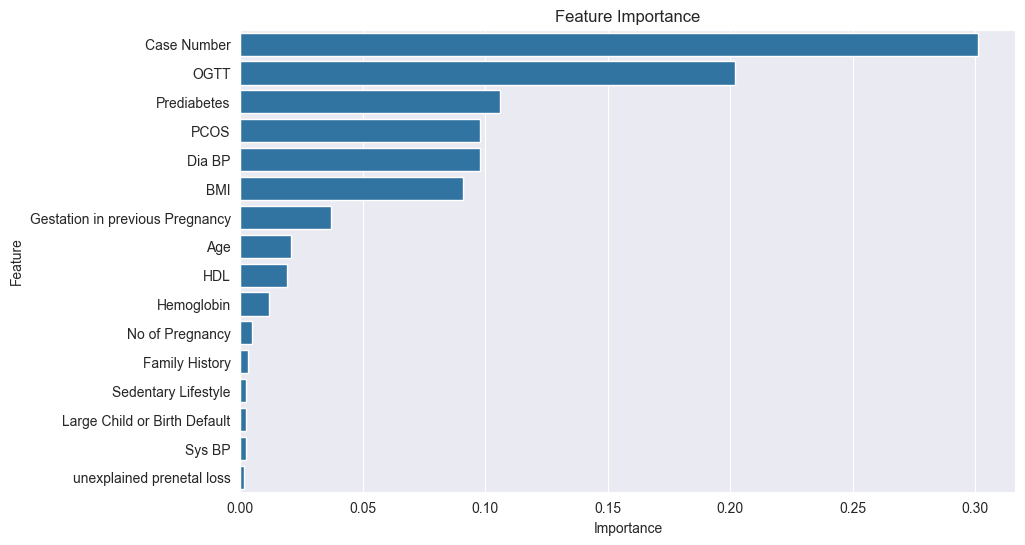

In [99]:
importances = rf_model.feature_importances_
feature_names = X_train_normalized.columns
feature_importances = pd.DataFrame({'Feature': feature_names,'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending = False)
print(feature_importances)

plt.figure(figsize=(10,6))
sns.barplot(x = 'Importance', y='Feature', data = feature_importances)
plt.title("Feature Importance")
plt.show

In [100]:
from sklearn.svm import SVC
# Instantiate the Support Vector Machine model
svm_model = SVC(random_state=42)

# Fit the model to the normalized training data
svm_model.fit(X_train_normalized, y_train)

# Predictions on the test set
y_pred_svm = svm_model.predict(X_test_normalized)

# Evaluate the performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.9659574468085106

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       448
           1       0.93      0.98      0.95       257

    accuracy                           0.97       705
   macro avg       0.96      0.97      0.96       705
weighted avg       0.97      0.97      0.97       705


Confusion Matrix:
[[429  19]
 [  5 252]]


In [101]:
from sklearn.neural_network import MLPClassifier
# Instantiate the Artificial Neural Network model
ann_model = MLPClassifier(random_state=42)
# Fit the model to the normalized training data
ann_model.fit(X_train_normalized, y_train)
# Predictions on the test set
y_pred_ann = ann_model.predict(X_test_normalized)

# Evaluate the performance
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("ANN Accuracy:", accuracy_ann)
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))

ANN Accuracy: 0.9659574468085106

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       448
           1       0.95      0.96      0.95       257

    accuracy                           0.97       705
   macro avg       0.96      0.96      0.96       705
weighted avg       0.97      0.97      0.97       705


Confusion Matrix:
[[434  14]
 [ 10 247]]


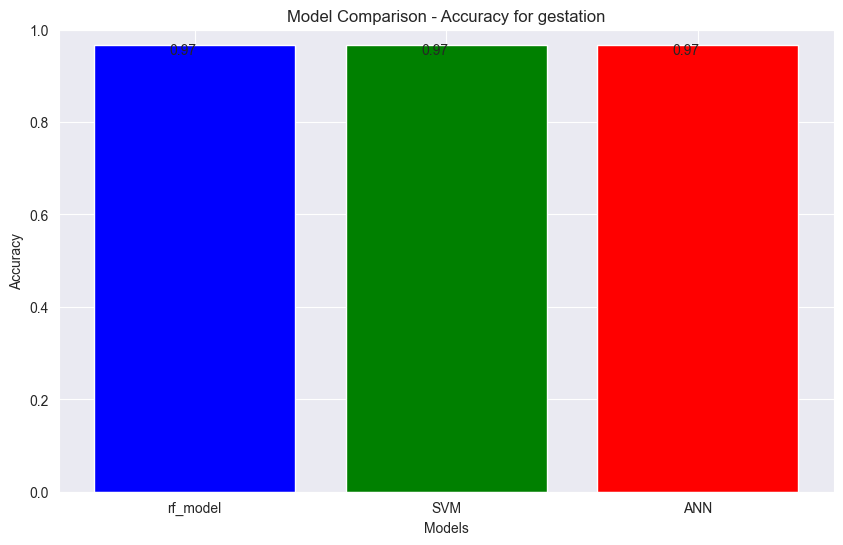

In [102]:
import matplotlib.pyplot as plt
import numpy as np
# List of model names
models = ['rf_model', 'SVM', 'ANN']
# List of accuracy scores for each model
accuracies = [accuracy_rf, accuracy_svm, accuracy_ann]
# Create a bar plot with values on top of the bars
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red'])
# Add values on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() - 0.02, f'{accuracy:.2f}', fontsize=10)
    
plt.title('Model Comparison - Accuracy for gestation')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Set y-axis limit to the range of accuracy scores (0 to 1)
plt.show()

HYBRID MODEL

In [103]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [104]:
# Train Artificial Neural Network
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann_classifier.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [105]:
# Predictions from Random Forest and ANN
rf_predictions = rf_classifier.predict(X_test)
ann_predictions = ann_classifier.predict(X_test)

In [106]:
# Combine predictions
hybrid_predictions = []
for rf_pred, ann_pred in zip(rf_predictions, ann_predictions):
    # Combine predictions using a simple rule (e.g., voting)
    hybrid_pred = 1 if (rf_pred + ann_pred) >= 1 else 0
    hybrid_predictions.append(hybrid_pred)

In [107]:
 # Evaluate accuracy
hybrid_accuracy1 = accuracy_score(y_test, hybrid_predictions)
print("Hybrid Model Accuracy1:", hybrid_accuracy1)

Hybrid Model Accuracy1: 0.9702127659574468


In [108]:
 # Define weights for each model
rf_weight = 0.6
ann_weight = 0.4

In [109]:
# Combine predictions using weighted average
hybrid_predictions = []
for rf_pred, ann_pred in zip(rf_predictions, ann_predictions):
    hybrid_pred = np.round(rf_pred * rf_weight + ann_pred * ann_weight)
    hybrid_predictions.append(hybrid_pred)

In [110]:
# Evaluate accuracy
hybrid_accuracy2 = accuracy_score(y_test, hybrid_predictions)
print("Hybrid Model Accuracy:", hybrid_accuracy2)

Hybrid Model Accuracy: 0.9659574468085106


In [111]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
# Generate predictions from base models for training meta-learner
rf_train_pred = cross_val_predict(rf_classifier, X_train, y_train, cv=5, method='predict_proba')[:, 1]
ann_train_pred = cross_val_predict(ann_classifier, X_train, y_train, cv=5, method='predict_proba')[:, 1]
# Stack the predictions horizontally
stacked_train_predictions = np.column_stack((rf_train_pred, ann_train_pred))
# Train meta-learner (Logistic Regression) on stacked predictions
meta_learner = LogisticRegression()
meta_learner.fit(stacked_train_predictions, y_train)
# Generate predictions from base models for testing
rf_test_pred = rf_classifier.predict_proba(X_test)[:, 1]
ann_test_pred = ann_classifier.predict_proba(X_test)[:, 1]
# Stack the test predictions horizontally
stacked_test_predictions = np.column_stack((rf_test_pred, ann_test_pred))
# Predict using meta-learner
stacked_predictions = meta_learner.predict(stacked_test_predictions)
# Evaluate accuracy
stacked_accuracy = accuracy_score(y_test, stacked_predictions)
print("Stacked Model Accuracy:", stacked_accuracy)


Stacked Model Accuracy: 0.9631205673758865


In [112]:
 # Combine predictions using averaging (mean)
averaged_predictions = (rf_predictions + ann_predictions) / 2
# Round the averaged predictions to the nearest integer
averaged_predictions = np.round(averaged_predictions).astype(int)
# Evaluate accuracy
averaged_accuracy = accuracy_score(y_test, averaged_predictions)
print("Averaged Hybrid Model Accuracy:", averaged_accuracy)

Averaged Hybrid Model Accuracy: 0.9659574468085106


(0.0, 1.0)

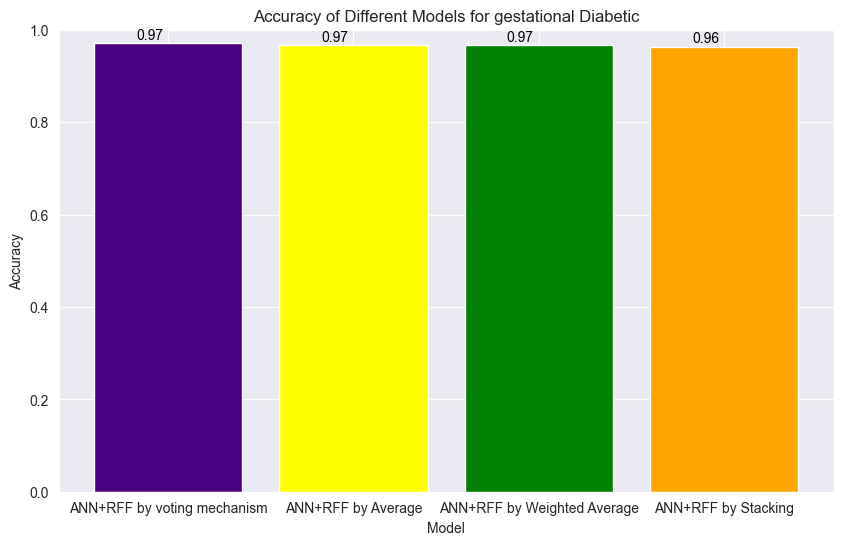

In [113]:
import matplotlib.pyplot as plt
# List of model names and their corresponding accuracies
models = ['ANN+RFF by voting mechanism','ANN+RFF by Average', 'ANN+RFF by Weighted Average', 'ANN+RFF by Stacking']
# List of accuracy scores for each model
accuracies = [hybrid_accuracy1, averaged_accuracy, hybrid_accuracy2, stacked_accuracy]
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['indigo', 'yellow', 'green', 'orange'])
# Add accuracy values on top of the bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{acc:.2f}', ha='center', color='black', fontsize=10)
    
plt.title('Accuracy of Different Models for gestational Diabetic')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Set y-axis limits

In [248]:
#Reading the data file for preclamsia
df = pd.read_excel(r"C:\Users\DELL 7470\Desktop\HULL RESEARCH WORK\Early-onset severe preeclampsia 1.xlsx")

df.head()

,Number,Age,Gravidity,Parity,GA Del,Fetuses,Marital,HIV stat,ARVs,Mpilo,...,Antihy,Mag sulp,Cortico,Reas.1,IOL,IOL suc,MOD,Compli,Ant USS,Sex
0,MP55708,39,8,7,29.86,0,NaN,0.0,0.0,NaN,...,1.0,1.0,0.0,0.0,0.0,NaN,1,1.0,4.0,2
1,MP5504,31,3,2,28.00,0,NaN,0.0,0.0,NaN,...,1.0,0.0,0.0,0.0,0.0,NaN,4,1.0,4.0,1
2,MP52062,24,4,3,29.42,0,NaN,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,NaN,4,0.0,4.0,1
3,MP32046,30,4,3,30.00,0,NaN,0.0,0.0,NaN,...,1.0,1.0,0.0,0.0,0.0,NaN,4,0.0,4.0,2
4,MP41254,19,1,0,31.28,0,NaN,2.0,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,NaN,4,0.0,4.0,2


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Number     238 non-null    object 
 1   Age        238 non-null    int64  
 2   Gravidity  238 non-null    int64  
 3   Parity     238 non-null    int64  
 4   GA Del     238 non-null    float64
 5   Fetuses    238 non-null    int64  
 6   Marital    87 non-null     float64
 7   HIV stat   237 non-null    float64
 8   ARVs       187 non-null    float64
 9   Mpilo      39 non-null     float64
 10  Ref cases  202 non-null    float64
 11  Aspirin    238 non-null    int64  
 12  Pre-ex     238 non-null    int64  
 13  Past obs   238 non-null    int64  
 14  Ref dis    238 non-null    int64  
 15  SBP pres   226 non-null    float64
 16  DBP pres   226 non-null    float64
 17  Reas       225 non-null    float64
 18  Proteins   156 non-null    float64
 19  Plat co    219 non-null    float64
 20  Conv      

In [250]:
df.describe()

,Age,Gravidity,Parity,GA Del,Fetuses,Marital,HIV stat,ARVs,Mpilo,Ref cases,...,Antihy,Mag sulp,Cortico,Reas.1,IOL,IOL suc,MOD,Compli,Ant USS,Sex
count,238.000000,238.000000,238.000000,238.000000,238.000000,87.000000,237.000000,187.000000,39.000000,202.000000,...,226.000000,226.000000,225.000000,226.000000,225.000000,8.000000,238.000000,226.000000,226.000000,238.000000
mean,28.525210,2.579832,1.462185,29.669034,0.025210,0.758621,0.573840,0.155080,0.974359,1.831683,...,0.920354,0.570796,0.302222,0.420354,0.035556,0.500000,3.697479,0.278761,3.460177,1.466387
std,7.216176,1.440791,1.403972,3.063822,0.157093,0.456618,0.833509,0.362953,0.160128,0.988182,...,0.271345,0.496061,0.469845,0.763228,0.185592,0.534522,0.905255,0.449385,1.272166,0.499920
min,14.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,22.000000,1.000000,0.000000,28.000000,0.000000,0.500000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,4.000000,1.000000
50%,28.500000,2.000000,1.000000,30.140000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.500000,4.000000,0.000000,4.000000,1.000000
75%,34.000000,3.000000,2.000000,32.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,0.750000,0.000000,1.000000,4.000000,1.000000,4.000000,2.000000
max,48.000000,8.000000,7.000000,33.860000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,5.000000,2.000000


In [251]:
# Check for missing values in each column
missing_values = df.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Number         0
Age            0
Gravidity      0
Parity         0
GA Del         0
Fetuses        0
Marital      151
HIV stat       1
ARVs          51
Mpilo        199
Ref cases     36
Aspirin        0
Pre-ex         0
Past obs       0
Ref dis        0
SBP pres      12
DBP pres      12
Reas          13
Proteins      82
Plat co       19
Conv           9
Antihy        12
Mag sulp      12
Cortico       13
Reas.1        12
IOL           13
IOL suc      230
MOD            0
Compli        12
Ant USS       12
Sex            0
dtype: int64


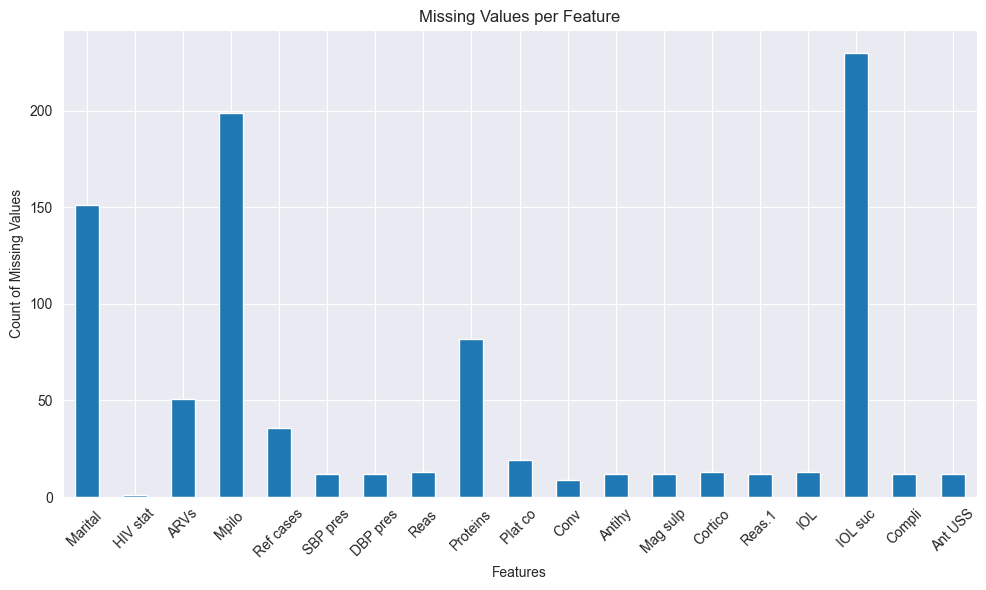

In [252]:
import matplotlib.pyplot as plt
import pandas as pd
# Assuming your DataFrame is named 'df'
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0] # Filter features with missing values
# Create a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45) # Rotate x-axis labels for readability
# Show the plot
plt.tight_layout()
plt.show()

In [253]:
# Filling missing values for numerical features
# Numerical columns for median imputation
numerical_columns = ['HIV stat', 'ARVs', 'Ref cases', 'SBP pres', 'DBP pres','Reas', 'Plat co', 'Conv', 'Antihy','Mag sulp','Cortico',
'Reas.1','Compli','Ant USS', 'IOL']

# Impute missing values with the median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
# Check if there are any remaining missing values
remaining_missing_values = df.isnull().sum()
# Display the columns with missing values and their counts (after imputation)
remaining_missing_values[remaining_missing_values > 0]

Marital     151
Mpilo       199
Proteins     82
IOL suc     230
dtype: int64

In [254]:
# Check for missing values in each column
missing_values = df.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Number         0
Age            0
Gravidity      0
Parity         0
GA Del         0
Fetuses        0
Marital      151
HIV stat       0
ARVs           0
Mpilo        199
Ref cases      0
Aspirin        0
Pre-ex         0
Past obs       0
Ref dis        0
SBP pres       0
DBP pres       0
Reas           0
Proteins      82
Plat co        0
Conv           0
Antihy         0
Mag sulp       0
Cortico        0
Reas.1         0
IOL            0
IOL suc      230
MOD            0
Compli         0
Ant USS        0
Sex            0
dtype: int64


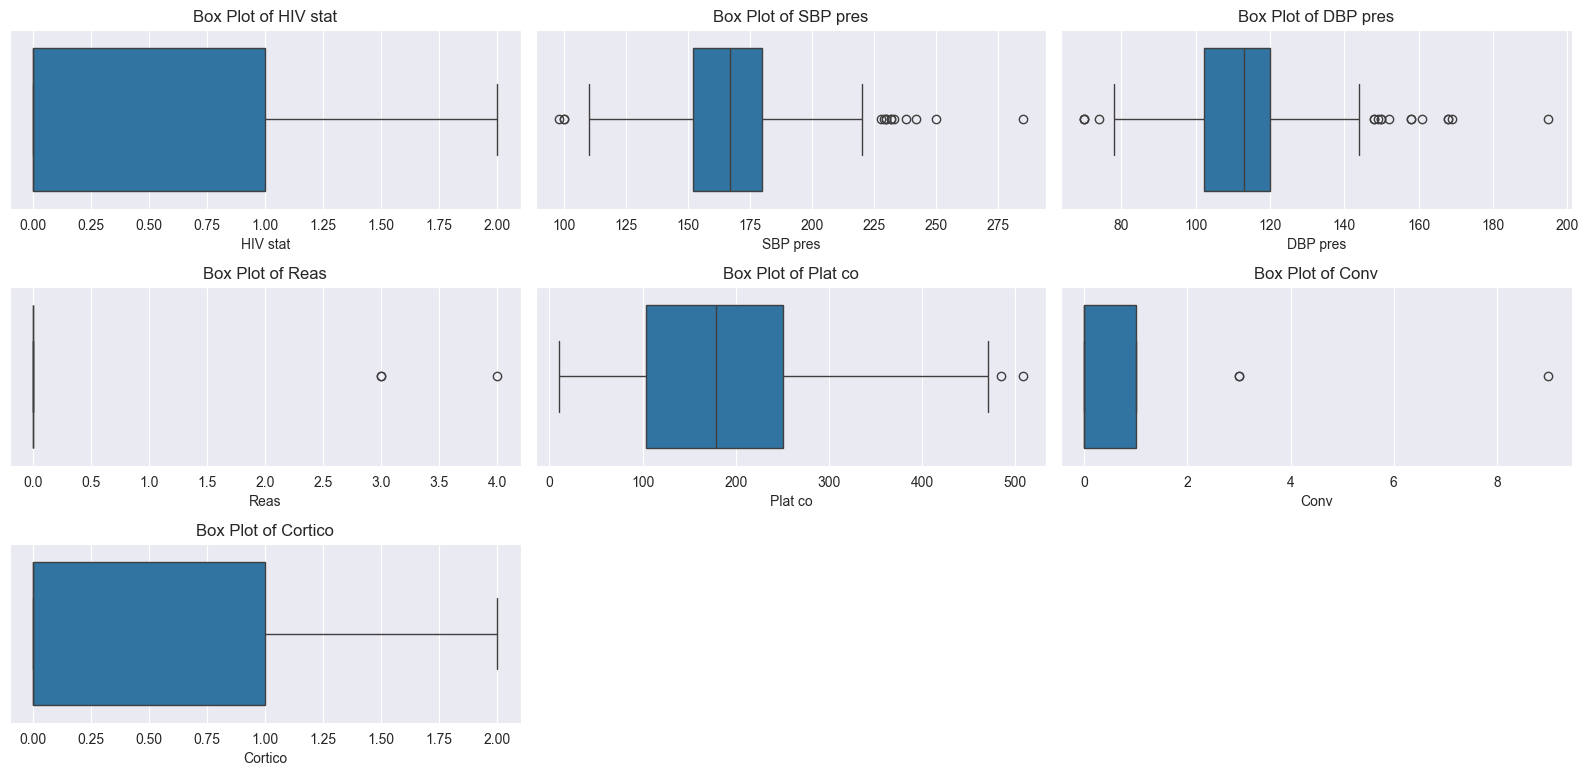

Outliers in SBP pres:
      Number  Age  Gravidity  Parity  GA Del  Fetuses  Marital   HIV stat  \
2    MP52062   24          4       3   29.42        0       NaN       0.0   
4    MP41254   19          1       0   31.28        0       NaN       2.0   
19   MP54881   32          3       2   32.71        0       1.0       0.0   
30   MP36282   38          4       3   23.42        0       NaN       0.0   
35   MP44565   30          4       2   33.42        0       NaN       0.0   
46   MP34013   26          3       2   27.00        0       NaN       0.0   
62   MP31040   40          4       3   26.00        0       1.0       1.0   
69   MP26649   36          5       4   33.42        0       1.0       1.0   
121   MP8831   40          5       4   33.71        0       0.0       0.0   
132   MP3099   35          2       1   29.57        0       NaN       1.0   
154  MP54881   32          3       2   32.71        0       1.0       0.0   
186   984235   37          3       2   33.57        0 

In [255]:
#Checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Specify numerical columns for outlier detection
numerical_columns = ['HIV stat', 'SBP pres', 'DBP pres', 'Reas', 'Plat co','Conv','Cortico',]

# Create subplots for outlier visualization
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')
    
plt.tight_layout()
plt.show()

# Define a function to identify outliers using IQR method
def identify_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
# Detect and display outliers for each numerical column
for column in numerical_columns:
    outliers = identify_outliers_iqr(df, column)
    if not outliers.empty:
        print(f'Outliers in {column}:')
        print(outliers)

In [256]:
# Define a function to handle outliers using IQR method
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), data[column].median(), data[column])

# Specify numerical columns for outlier handling
numerical_columns = ['HIV stat', 'SBP pres', 'DBP pres', 'Reas', 'Plat co', 'Conv','Cortico',]
# Handle outliers for each numerical column
for column in numerical_columns:
    handle_outliers_iqr(df, column)


In [257]:
df['Compli'].value_counts()

Compli
0.0    175
1.0     63
Name: count, dtype: int64

In [258]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Check unique values in the non-numeric columns to decide how to handle them
for column in non_numeric_columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())

# Example: Drop non-numeric columns if they are not needed
data = df.drop(columns=non_numeric_columns)

# Convert all remaining columns to numeric where applicable, coercing errors to NaN
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Handle missing values by filling them with the mean
df.fillna(df.mean(), inplace=True)

print(df.dtypes)  # Verify all columns are numeric now

Non-numeric columns: Index(['Number'], dtype='object')
Unique values in Number:
['MP55708' 'MP5504' 'MP52062' 'MP32046' 'MP41254' 995709 'MP37198'
 'MP42663' 'MP32382' 'MP44329' 'MP50539' 'MP36591' 'MP49240' 'MP36707'
 'MP39502' 'MP37178' 'MP40164' 'MP53077' 'MP39345' 'MP54881' 'MP41211'
 'MP41614' 973542 'MP32320' 'MP52247' 'MP32424' 'MP53227' 'MP46342'
 'MP47876' 'MP35154' 'MP36282' 961600 'MP45279' 969779 'MP32498' 'MP44565'
 'MP41262' 'MP40175' 'MP39336' 'MP38982' 'MP36412' 'MP37704' 'MP34825'
 'MP33794' 'MP51919' 'MP52059' 'MP34013' 'MP51513' 'MP42819' 'MP32019'
 919378 'MP37474' 'MP33418' 'MP56626' 'MP57047' 'MP54310' 921715 'MP23876'
 'MP25342' 'MP21410' 'MP25899' 'MP31040' 982318 'MP30315' 'MP29376'
 'MP30608' 'MP28604' 'MP26621' 'MP26649' 'MP28235' 'MP27633' 'MP23469'
 'MP25403' 'MP23477' 'MP22139' 'MP26509' 'MP21464' 'MP24418' 945669
 'MP23936' 'MP19841' 'MP19842' 'MP23902' 'MP25182' 'MP19702' 'MP19258'
 'MP20952' 'MP49830' 'MP33937' 'MP51079' 'MP40882' 'MP49845' 'MP59756'
 '

In [259]:
# Separate features (X) and target variable (y)
X = df.drop('Compli', axis=1)
y = df['Compli']

In [260]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [261]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the scaler on the training data
X_train_normalized = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)
# Convert the normalized arrays back to DataFrames (optional)
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X.columns)



In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
# Fit the model to the normalized training data
rf_model.fit(X_train_normalized, y_train)
# Predictions on the test set
y_pred_rf = rf_model.predict(X_test_normalized)
# Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8125

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89        38
         1.0       0.57      0.40      0.47        10

    accuracy                           0.81        48
   macro avg       0.71      0.66      0.68        48
weighted avg       0.79      0.81      0.80        48


Confusion Matrix:
[[35  3]
 [ 6  4]]


      Feature  Importance
19    Plat co    0.345292
4      GA Del    0.108523
16   DBP pres    0.090817
15   SBP pres    0.071471
1         Age    0.054690
2   Gravidity    0.044752
3      Parity    0.035039
14    Ref dis    0.034172
18   Proteins    0.028732
24     Reas.1    0.017704
22   Mag sulp    0.017492
7    HIV stat    0.016083
23    Cortico    0.015701
0      Number    0.015566
28    Ant USS    0.014823
6    Marital     0.014041
10  Ref cases    0.012830
20       Conv    0.012493
29       Sex     0.011679
8        ARVs    0.010688
9      Mpilo     0.007392
13   Past obs    0.005476
27        MOD    0.004625
26    IOL suc    0.004364
25        IOL    0.001962
21     Antihy    0.001633
11    Aspirin    0.001006
12     Pre-ex    0.000704
5     Fetuses    0.000250
17       Reas    0.000000


<function matplotlib.pyplot.show(close=None, block=None)>

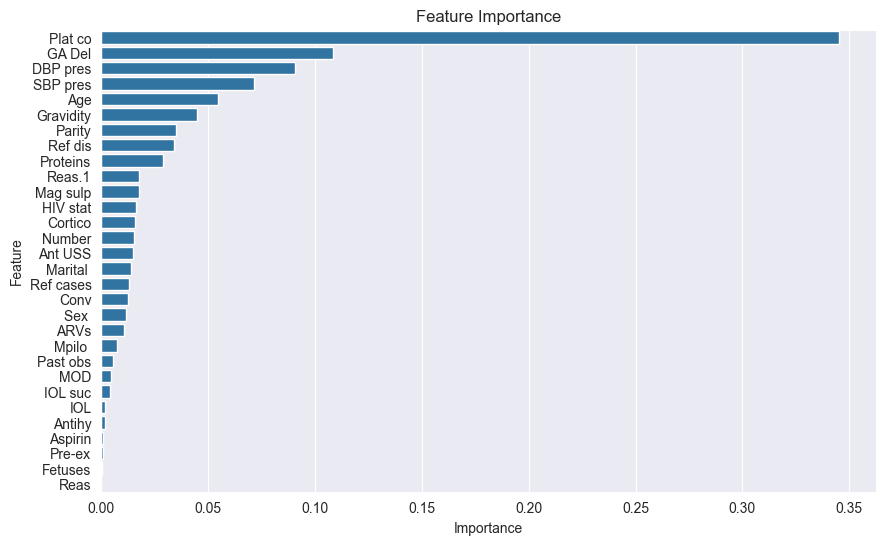

In [263]:
importances = rf_model.feature_importances_
feature_names = X_train_normalized.columns
feature_importances = pd.DataFrame({'Feature': feature_names,'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending = False)
print(feature_importances)

plt.figure(figsize=(10,6))
sns.barplot(x = 'Importance', y='Feature', data = feature_importances)
plt.title("Feature Importance")
plt.show

In [264]:
from sklearn.neural_network import MLPClassifier
# Instantiate the Artificial Neural Network model
ann_model = MLPClassifier(random_state=42)
# Fit the model to the normalized training data
ann_model.fit(X_train_normalized, y_train)
# Predictions on the test set
y_pred_ann = ann_model.predict(X_test_normalized)
# Evaluate the performance
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("ANN Accuracy:", accuracy_ann)
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))

ANN Accuracy: 0.8125

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        38
         1.0       0.56      0.50      0.53        10

    accuracy                           0.81        48
   macro avg       0.71      0.70      0.70        48
weighted avg       0.81      0.81      0.81        48


Confusion Matrix:
[[34  4]
 [ 5  5]]


In [265]:
y_pred_ann


array([0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])

In [266]:
from sklearn.svm import SVC
# Instantiate the Support Vector Machine model
svm_model = SVC(random_state=42)
# Fit the model to the normalized training data
svm_model.fit(X_train_normalized, y_train)
# Predictions on the test set
y_pred_svm = svm_model.predict(X_test_normalized)
# Evaluate the performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.8125

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89        38
         1.0       0.67      0.20      0.31        10

    accuracy                           0.81        48
   macro avg       0.74      0.59      0.60        48
weighted avg       0.79      0.81      0.77        48


Confusion Matrix:
[[37  1]
 [ 8  2]]


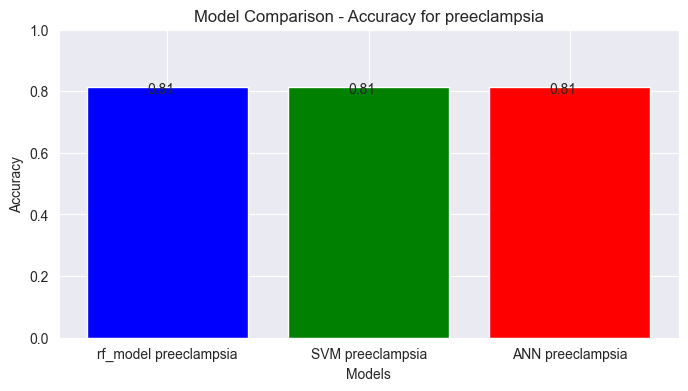

In [267]:
import matplotlib.pyplot as plt
import numpy as np
# List of model names
models = ['rf_model preeclampsia', 'SVM preeclampsia', 'ANN preeclampsia']
# List of accuracy scores for each model
accuracies = [accuracy_rf, accuracy_svm, accuracy_ann]
# Create a bar plot with values on top of the bars
plt.figure(figsize=(8, 4))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red'])
# Add values on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() - 0.02, f'{accuracy:.2f}', fontsize=10)
    
plt.title('Model Comparison - Accuracy for preeclampsia')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Set y-axis limit to the range of accuracy scores (0 to 1)
plt.show()

HYBRID MODEL

In [268]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [269]:
# Train Artificial Neural Network
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann_classifier.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [270]:
# Predictions from Random Forest and ANN
rf_predictions = rf_classifier.predict(X_test)
ann_predictions = ann_classifier.predict(X_test)

In [271]:
# Combine predictions
hybrid_predictions = []
for rf_pred, ann_pred in zip(rf_predictions, ann_predictions):
# Combine predictions using a simple rule (e.g., voting)
    hybrid_pred = 1 if (rf_pred + ann_pred) >= 1 else 0
    hybrid_predictions.append(hybrid_pred)


In [272]:
# Evaluate accuracy
hybrid_accuracy1 = accuracy_score(y_test, hybrid_predictions)
print("Hybrid Model Accuracy1:", hybrid_accuracy1)

Hybrid Model Accuracy1: 0.8125


In [273]:
# Define weights for each model
rf_weight = 0.6
ann_weight = 0.4

In [274]:
# Combine predictions using weighted average
hybrid_predictions = []
for rf_pred, ann_pred in zip(rf_predictions, ann_predictions):
    hybrid_pred = np.round(rf_pred * rf_weight + ann_pred * ann_weight)
    hybrid_predictions.append(hybrid_pred)

In [275]:
 # Evaluate accuracy
hybrid_accuracy2 = accuracy_score(y_test, hybrid_predictions)
print("Hybrid Model Accuracy:", hybrid_accuracy2)

Hybrid Model Accuracy: 0.8125


In [276]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
# Generate predictions from base models for training meta-learner
rf_train_pred = cross_val_predict(rf_classifier, X_train, y_train, cv=5, method='predict_proba')[:, 1]
ann_train_pred = cross_val_predict(ann_classifier, X_train, y_train, cv=5, method='predict_proba')[:, 1]
# Stack the predictions horizontally
stacked_train_predictions = np.column_stack((rf_train_pred, ann_train_pred))
# Train meta-learner (Logistic Regression) on stacked predictions
meta_learner = LogisticRegression()
meta_learner.fit(stacked_train_predictions, y_train)
# Generate predictions from base models for testing
rf_test_pred = rf_classifier.predict_proba(X_test)[:, 1]
ann_test_pred = ann_classifier.predict_proba(X_test)[:, 1]
# Stack the test predictions horizontally
stacked_test_predictions = np.column_stack((rf_test_pred, ann_test_pred))
# Predict using meta-learner
stacked_predictions = meta_learner.predict(stacked_test_predictions)
# Evaluate accuracy
stacked_accuracy = accuracy_score(y_test, stacked_predictions)
print("Stacked Model Accuracy:", stacked_accuracy)

Stacked Model Accuracy: 0.8333333333333334


In [245]:
# Combine predictions using averaging (mean)
averaged_predictions = (rf_predictions + ann_predictions) / 2
# Round the averaged predictions to the nearest integer
averaged_predictions = np.round(averaged_predictions).astype(int)
# Evaluate accuracy
averaged_accuracy = accuracy_score(y_test, averaged_predictions)
print("Averaged Hybrid Model Accuracy:", averaged_accuracy)

Averaged Hybrid Model Accuracy: 0.8333333333333334


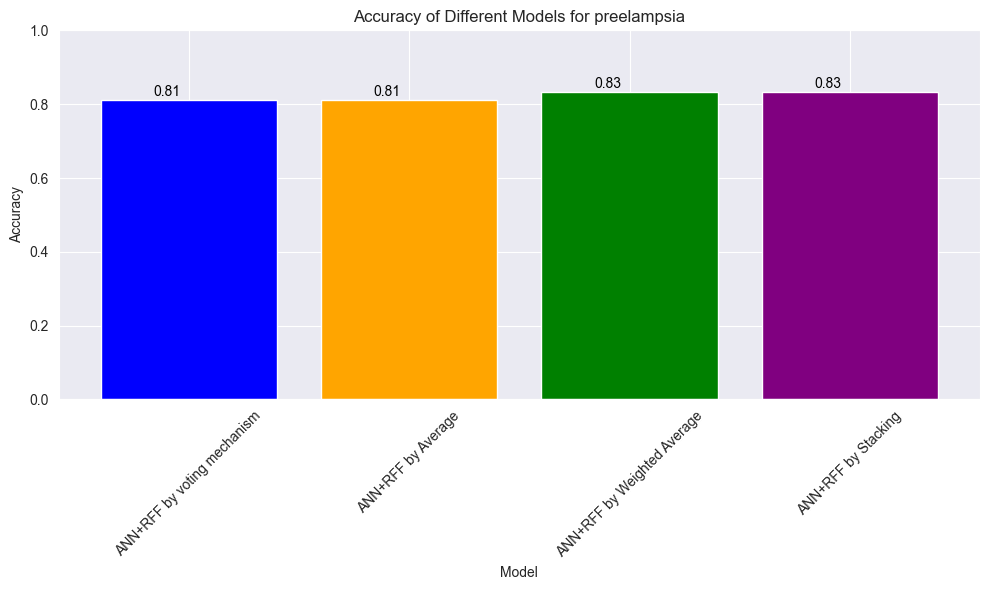

In [277]:
import matplotlib.pyplot as plt
# List of model names and their corresponding accuracies
models = ['ANN+RFF by voting mechanism','ANN+RFF by Average', 'ANN+RFF by Weighted Average', 'ANN+RFF by Stacking']
# List of accuracy scores for each model
accuracies = [hybrid_accuracy1, hybrid_accuracy2, averaged_accuracy, stacked_accuracy]
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'purple'])
# Add accuracy values on top of the bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{acc:.2f}', ha='center', color='black', fontsize=10)

plt.title('Accuracy of Different Models for preelampsia')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Set y-axis limits
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent clipping of labels
plt.show()